## 3-3 Sentiment Analysis

There are a number of ways to "measure" the sentiment of a text or a group of texts. We are going to start with the simplest way, which uses a **control vocabulary** which is nothing more than a list of words that have been evaluated as having either a positive or negative emotional valence, or "sentiment."

Please note: we are not using the NLTK library for this exercise. We are using the `textblob` library, which is a wrapper around NLTK and other libraries. It is a very simple library to use, and it has a lot of functionality. You can install it with `conda install textblob`, if you have not already done so.

Housekeeping:

In [1]:
import textwrap
def display_text(text):
    wrap_list = textwrap.wrap(text, 72)
    return wrap_list

### 3-3-1 The AFINN Way

For demonstration purposes, we are starting with a simple, and somewhat dated, library known as AFINN, which is a list of words (also known as a lexicon) which have been assigned an integer value between -5 (very negative) and +5 (very positive). The AFINN list is available in the `nltk` library. (But there's also a copy available in the class repo in the assets directory: `assets/afinn.txt`.) 

The AFINN list is a good starting point for sentiment analysis, but it is not the only one. There are many other lexicons available, and you can also create your own. The AFINN list is a good starting point because it is simple to use and easy to understand.

If you want to try AFINN out for yourself, you can install it with the following command: `pip install afinn`.


In [2]:
# IMPORTS
from nltk.tokenize import sent_tokenize
from afinn import Afinn

# TEST DATA
afinn = Afinn()
with open("../data/mdg.txt", mode="r", encoding="utf-8") as f:
    mdg = f.read()

# Break our text into sentences:
sentences = sent_tokenize(mdg)

# Assign each sentence a sentiment score:
sentiments = []
for sentence in sentences:
    sentsent = afinn.score(sentence)
    sentiments.append(sentsent)

print(len(sentences))
print(sentiments[0:10])

701
[0.0, 0.0, 0.0, -1.0, 0.0, -1.0, 0.0, 1.0, 4.0, -1.0]


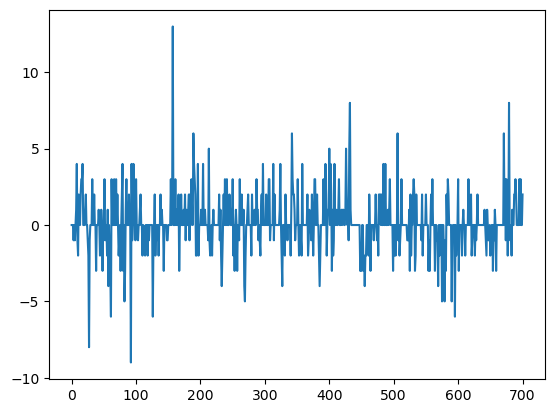

In [3]:
# 700 numbers is a lot to look at. 
# Let's graph the data instead!
import matplotlib.pyplot as plt

plt.plot(sentiments)

That graph is a little hard to read, so let's make it a little easier to read by using a running average, which will "smooth" the graph out a little bit. We are going to use numpy to do this.

In [4]:
import numpy as np

def running_avg(a_list, window):
    rm_array = np.asarray(a_list)
    cumsum = np.cumsum(np.insert(rm_array, 0, 0))
    return (cumsum[window:] - cumsum[:-window]) / window

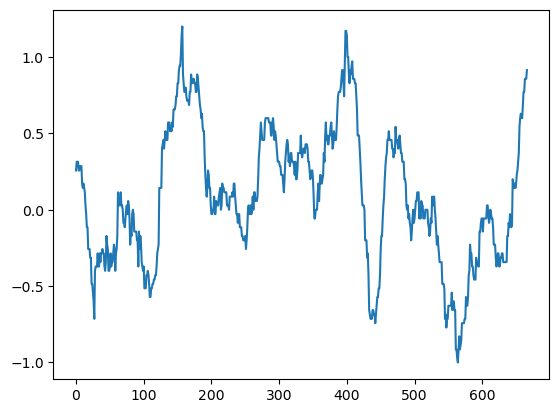

In [8]:
# We can adjust the "smoothness" of the graph 
# by changing the window size.
sentiments_avg = running_avg(sentiments, 35)
plt.plot(sentiments_avg)

### TextBlob

For our purposes [TextBlob](https://textblob.readthedocs.io/en/dev/) is simpler to work with in an introductory environment than the NLTK. It does all the things that the NLTK does by being a wrapper around the NLTK. You now know so many of these tasks: tokenization, word frequencies and distributions, stemming, lemmatization. You're getting a grip on this!

As always, you should always "[read the docs](https://textblob.readthedocs.io/en/dev/)" for yourself. Learning to read documentation is just as important as, and is one step towards getting better at, writing documentation. If nothing else, encountering documentation that isn't clear or is not "newbie-friendly" should spur you to write better, friendlier documentation.

What you are going to see below is that TextBlob outputs two values as part of its sentiment analysis: polarity and subjectivity. Polarity is a value between -1 and 1, where -1 is very negative and 1 is very positive. Subjectivity is a value between 0 and 1, where 0 is very objective and 1 is very subjective. The subjectivity score can be useful for determining how "opinionated" a text is. For example, a news article might have a low subjectivity score, while a blog post might have a high subjectivity score. The polarity score can be useful for determining how "positive" or "negative" a text is. For example, a news article might have a low polarity score, while a blog post might have a high polarity score.

In [9]:
# IMPORTS
from textblob import TextBlob

# DATA
# We still have "mdg" from earlier in this notebook.

# DEMO DATA
obj = TextBlob("Python is a high-level, general-purpose programming language.")
sub = TextBlob("Python is the best programming language.")

# Examining the outputs
print(f"Values for the objective statement is {obj.sentiment}.")
print(f"Values for subjective statement is {sub.sentiment}.")
print(f"The two polarities are {obj.sentiment.polarity} and {sub.sentiment.polarity}.")
print(f"The two subjectivities are {obj.sentiment.subjectivity} and {sub.sentiment.subjectivity}.")

Values for the objective statement is Sentiment(polarity=0.0, subjectivity=0.0).
Values for subjective statement is Sentiment(polarity=1.0, subjectivity=0.3).
The two polarities are 0.0 and 1.0.
The two subjectivities are 0.0 and 0.3.


## Working with a Single, Longer Text

Before you work through this first section of the notebook, watch this video excerpt of a lecture by Kurt Vonnegut on ["The Shape of Stories."](https://www.youtube.com/watch?v=j9Qsiu8qqvA) (First, Vonnegut is funny, and, second, what happens next here will make more sense.)

In [10]:
# Let's start with the short story
mdg_ = TextBlob(mdg)

for sentence in mdg_.sentences[0:3]:
    print(sentence)

"Off there to the right -- somewhere -- is a large island," said Whitney.
"It's rather a mystery -- "
"What island is it?"
Rainsford asked.


In [11]:
for sentence in mdg_.sentences[0:3]:
    print(sentence.sentiment)

Sentiment(polarity=0.25, subjectivity=0.4821428571428571)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


Now that we have both polarities and subjectivities for all 701 sentences in "The Most Dangerous Game," we can graph them:

In [12]:
# Getting numbers for the sentences
sentence_count = [float(i) for i in range(0, len(mdg_.sentences))]

# Getting polarity & then subjectivity ratings for each sentence
mdg_polarities = [sentence.sentiment.polarity for sentence in mdg_.sentences]
mdg_subjectivities = [sentence.sentiment.subjectivity for sentence in mdg_.sentences]

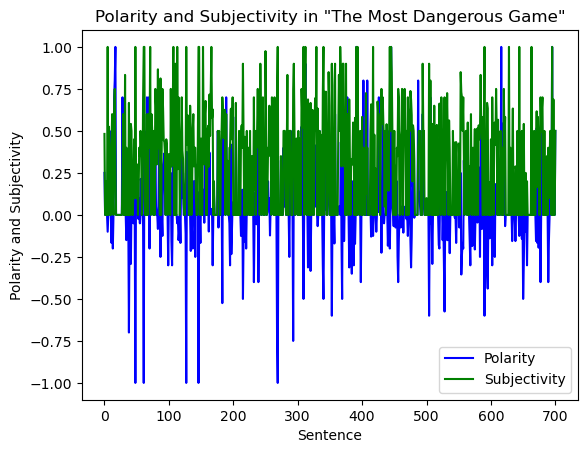

In [13]:
# Make a plot with the lines

# Our two lines
plt.plot(sentence_count, mdg_polarities, 'b', label="Polarity") 
plt.plot(sentence_count, mdg_subjectivities, 'g', label="Subjectivity") 

# Plot niceties
plt.xlabel("Sentence")
plt.ylabel("Polarity and Subjectivity")
plt.title('Polarity and Subjectivity in "The Most Dangerous Game"')
plt.grid(False)
plt.legend()

# Display
plt.show()

That is very difficult to see. There are a variety of ways to "smooth" this, including averaging by a window as we did above, but that tends to shrink the overall length of the plot -- that's an English professor joke. Let's try something mathematical. (I often use **NumPy**'s polynomial fit function here, but I thought I would **SciPy**'s interpolate just for the sake of variety.)

<div class="alert alert-block alert-warning">
<b>Note:</b> There really are a lot of ways to smooth a "spiky" plot. A lot of disciplines need it, so if you search for methods, you are going to find everything from financial analysts looking to smooth stock prices in order to discern trends to biologists looking to smooth population counts. Try as many as you like until you find something that works for you. <em>Even try writing your own code!</em></div>

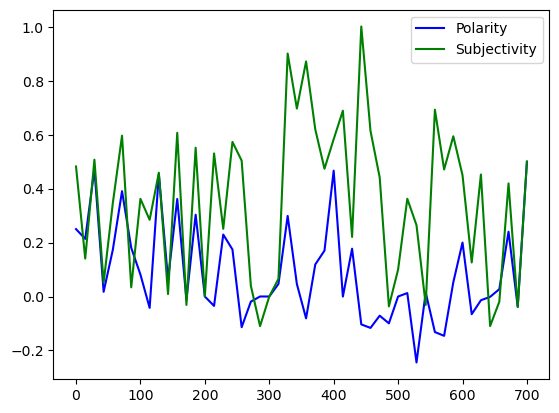

In [14]:
import numpy as np
from scipy.interpolate import interp1d

# Using SciPy's to smooth our plots
xnew = np.linspace(0, (len(sentence_count)-1)) # It didn't like the count, so I subtracted 1.
f_cubic_polar = interp1d(sentence_count, mdg_polarities, kind='cubic')
f_cubic_subject = interp1d(sentence_count, mdg_subjectivities, kind='cubic')

# Plot
# plt.scatter(sentence_count, mdg_polarities, 'b', ) 
# plt.scatter(sentence_count, mdg_subjectivities, 'g', ) 
plt.plot(xnew, f_cubic_polar(xnew), 'b', label="Polarity")
plt.plot(xnew, f_cubic_subject(xnew), 'g', label="Subjectivity")
plt.legend(loc='best')
plt.show()

That's kind of interesting: there seems to be a lot of congruence between polarity and subjectivity until almost halfway through the story: that suggests I should go back and read to see what happens there. And then we get congruence again towards the very end. 

## Gab Sentiments

In [15]:
# IMPORTS
import json

# DATA
with open("../data/gabs.json", 'r') as f:
    gabs = json.load(f)

# Convert to TextBlob objects:
blobs = [ TextBlob(gab) for gab in gabs ]

Before we proceed, let's do a quick visual inspection of some of the gabs: we discover quite quickly that they vary quite a bit in size.

In [17]:
# We can pick three random numbers
from random import randint
numbers = [randint(0, len(blobs)) for n in range(3)]

for i in numbers:
    print(blobs[i].sentiment)
    print(blobs[i])
    print("======")

Sentiment(polarity=0.0, subjectivity=0.0)
 Yo
 
Sentiment(polarity=-0.1, subjectivity=0.0)
 I'd rather go to jail than do that
 
Sentiment(polarity=-0.14333333333333337, subjectivity=0.6683333333333333)
 I’m not married.  I want to be- but I think my power level o’ fashyness freaks dudes out.  There’s conservative men where I’m at, but they’re like MAGApede level woke... and tbh it’s hard to just be myself around people like that.  I don’t want to hide who I am just to be loved.  That’s lame... and sad
 


In [18]:
# We can now get three dimensions for every gab:

# We will choose our gab at random
number = randint(0, len(blobs))
gab = blobs[number]
print(gab)
print(f"This gab is {len(gab.words)} words.")
print(f"It has a polarity of {gab.sentiment.polarity}")
print(f"and a subjectivity of {gab.sentiment.subjectivity}")

 lol
 
This gab is 1 words.
It has a polarity of 0.8
and a subjectivity of 0.7


### Can we visualize this?

We run calculations in separate cell because, inevitably, the graph will need some tweaking and thre's no reason to run the underlying calculations over and over.

In [19]:
# Word counts for all the gabs
x = [ len(blob) for blob in blobs ]

# Polarities
y = [ blob.sentiment.polarity for blob in blobs ]

# Subjectivity
z = [ blob.sentiment.subjectivity for blob in blobs ]

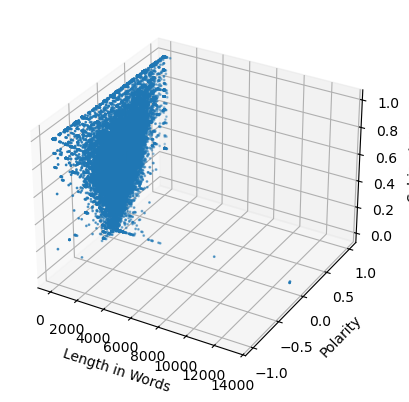

In [20]:
# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x, y, z, s=1)

ax.set_xlabel('Length in Words')
ax.set_ylabel('Polarity')
ax.set_zlabel('Subjectivity')

plt.show()

It looks like a couple of very long texts are packing the graph to the far left. If we drop anything longer than 3000 words, to see what happens.

To do that, we need either to identify the long texts in `x`, possibly using `enumerate()`, and then remove those items in `y` and `z`, or we could zip all three lists together and then use a list comprehension to remove the triplets containing the high word counts.

In [21]:
# Zip the lists together and convert the result into a list
xyz = list(zip(x, y, z))
print(xyz[0:3])

[(0, 0.0, 0.0), (5, 0.0, 0.0), (14, 0.0, 0.0)]


In [22]:
# List comprehension to filter only texts smaller than 2000 words
xyz_ = [ (x, y, z) for x, y, z in xyz if x < 2001 ]

In [23]:
# Now we unzip back to individual lists
# So we can re-use the code above

x_, y_, z_ = zip(*xyz_)

Note that I have inverted the x_ and z_ axes in hopes of getting a better visualization. (That meant changing the labels, too.)

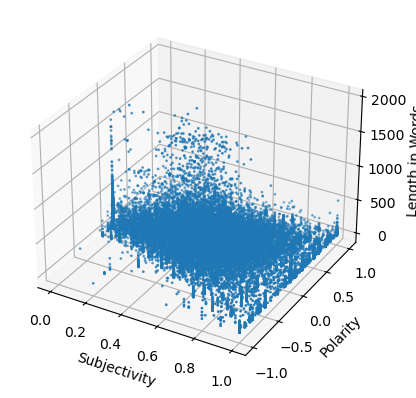

In [24]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(z_, y_, x_, s=1, depthshade = True)

ax.set_xlabel('Subjectivity')
ax.set_ylabel('Polarity')
ax.set_zlabel('Length in Words')

plt.show()

With all the word counts now on the "floor" of the graph, I think it would be interesting to revisit our word counts and lift the base numerical value to see if that helps us see more of what's happening in the "golden middle." This time, everything is going into a single cell.

<div class="alert alert-block alert-success">
<b>Up to you:</b> I have distinguished between the original <code>x, y, z</code> and the two 
    modified lists, <code>x_</code> and <code>x_100</code>, but there is nothing wrong with over-writing the previous objects. (It might even be advisable in terms of not taking up too much memory.)
</div>

In [ ]:
# List comprehension to filter texts by word count
xyz_min = [ (x, y, z) for x, y, z in xyz if 250 < x < 2001 ]
len(xyz_min)

In [ ]:
# Now we unzip back to individual lists
x_min, y_min, z_min = zip(*xyz_min)

# Plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(z_min, y_min, x_min, s=1, depthshade = True)

ax.set_xlabel('Subjectivity')
ax.set_ylabel('Polarity')
ax.set_zlabel('Length in Words')

plt.show()

It's very tempting to work and re-work a three-dimensional graph, but sometimes the easier course of action is to break the data up into two subplots.

In [ ]:
# 2D plots
plt.subplot(1, 2, 1)
plt.scatter(x_min, y_min, s=1)
plt.xlabel('Polarity')

plt.subplot(1, 2, 2)
plt.scatter(x_min, z_min, s=1)
plt.xlabel('Subjectivity')

plt.title('Word Count on the X')
plt.show()


Things rather even out. Perhaps there's another way to explore this...

## Emotional Verbs

What if we were to see what verbs most closely correspond to strong positive or negative sentiments? 

In [ ]:
# Let's find us a blob to work with
blobs[500]

In [ ]:
# Let's see its tags and explore how to access them
blobs[500].tags

In [ ]:
# This is pretty much the same as the NLTK 
# (Neater this time)
for word, tag in blobs[500].tags:
    if tag == 'VB' or tag == 'VBD' or tag == 'VBP':
        print(word)

Okay, having worked through how to get the data we want, it's time to pull it together to begin to get some interesting results:

In [ ]:
# Create a
positive_acts = []
for blob in blobs:
    if blob.sentiment.polarity >= 0.75:
        for word, tag in blob.tags:
            if tag == 'VB' or tag == 'VBD' or tag == 'VBP':
                positive_acts.append(word)

positive_set = set(positive_acts)
print(len(positive_acts))
print(len(positive_set))

In [ ]:
print(positive_set)

The next step might be to create tuples with each verb inheriting the polarity of the blob from which it was drawn and then averaging over the instances of that verb to map out which verbs have the higher, or lower, values.